In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")


class EDAAnalysis:
    def __init__(self, df):
        # Rename columns to standardized format
        df = df.rename(
            columns={"close": "Close", "volume": "Volume", "sentiment": "sentiments"}
        )
        self.df = df.copy()
        self.prepare_data()

    def prepare_data(self):
        self.df["Date"] = pd.to_datetime(self.df["Date"])
        self.df = self.df.sort_values("Date")
        self.df.set_index("Date", inplace=True)

        # Fill missing sentiment values if any
        if "sentiments" in self.df.columns:
            self.df["sentiments"] = self.df["sentiments"].fillna(0)

        # Add rolling averages for sentiment
        self.df["Sentiment_7D_Rolling"] = self.df["sentiments"].rolling(window=7).mean()
        self.df["Sentiment_14D_Rolling"] = (
            self.df["sentiments"].rolling(window=14).mean()
        )

        # Add lagged rolling averages for sentiment
        self.df["Sentiment_7D_Lagged"] = self.df["Sentiment_7D_Rolling"].shift(7)
        self.df["Sentiment_14D_Lagged"] = self.df["Sentiment_14D_Rolling"].shift(14)

    def add_technical_indicators(self):
        # Moving averages
        self.df["SMA_20"] = self.df["Close"].rolling(window=20).mean()
        self.df["SMA_50"] = self.df["Close"].rolling(window=50).mean()

        # Exponential Moving Average (EMA)
        self.df["EMA_20"] = self.df["Close"].ewm(span=20, adjust=False).mean()

        # RSI (Relative Strength Index)
        delta = self.df["Close"].diff()
        gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
        loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
        rs = gain / loss
        self.df["RSI"] = 100 - (100 / (1 + rs))

        # MACD
        exp1 = self.df["Close"].ewm(span=12, adjust=False).mean()
        exp2 = self.df["Close"].ewm(span=26, adjust=False).mean()
        self.df["MACD"] = exp1 - exp2
        self.df["Signal_Line"] = self.df["MACD"].ewm(span=9, adjust=False).mean()

        # Bollinger Bands
        self.df["BB_upper"] = (
            self.df["Close"].rolling(window=20).mean()
            + 2 * self.df["Close"].rolling(window=20).std()
        )
        self.df["BB_middle"] = self.df["Close"].rolling(window=20).mean()
        self.df["BB_lower"] = (
            self.df["Close"].rolling(window=20).mean()
            - 2 * self.df["Close"].rolling(window=20).std()
        )

        # Average True Range (ATR)
        high_low = self.df["Close"] - self.df["Close"].shift(1)
        self.df["ATR"] = high_low.rolling(window=14).mean()

        # On-Balance Volume (OBV)
        self.df["OBV"] = (
            (np.sign(self.df["Close"].diff()) * self.df["Volume"]).fillna(0).cumsum()
        )

        # Stochastic Oscillator
        self.df["Stochastic_K"] = 100 * (
            (self.df["Close"] - self.df["Close"].rolling(window=14).min())
            / (
                self.df["Close"].rolling(window=14).max()
                - self.df["Close"].rolling(window=14).min()
            )
        )

    def plot_technical_indicators(self):
        # Visualization functions for the indicators
        plt.figure(figsize=(14, 7))
        plt.plot(self.df["Close"], label="Close Price", color="blue")
        plt.plot(self.df["SMA_20"], label="SMA 20", color="orange")
        plt.plot(self.df["SMA_50"], label="SMA 50", color="green")
        plt.plot(self.df["EMA_20"], label="EMA 20", color="red")
        plt.title("Technical Indicators (SMA, EMA) on Close Price")
        plt.legend()
        plt.show()

    def plot_bollinger_bands(self):
        plt.figure(figsize=(14, 7))
        plt.plot(self.df["Close"], label="Close Price", color="blue")
        plt.plot(
            self.df["BB_upper"],
            label="Bollinger Upper Band",
            linestyle="--",
            color="orange",
        )
        plt.plot(self.df["BB_middle"], label="Bollinger Middle Band", color="grey")
        plt.plot(
            self.df["BB_lower"],
            label="Bollinger Lower Band",
            linestyle="--",
            color="orange",
        )
        plt.title("Bollinger Bands on Close Price")
        plt.legend()
        plt.show()

    def plot_rsi(self):
        plt.figure(figsize=(14, 5))
        plt.plot(self.df["RSI"], label="RSI", color="purple")
        plt.axhline(70, color="red", linestyle="--", label="Overbought")
        plt.axhline(30, color="green", linestyle="--", label="Oversold")
        plt.title("Relative Strength Index (RSI)")
        plt.legend()
        plt.show()

    def plot_correlation_heatmap(self):
        plt.figure(figsize=(10, 8))
        sns.heatmap(
            self.df[["Close", "Volume", "SMA_20", "SMA_50", "sentiments"]].corr(),
            annot=True,
            cmap="coolwarm",
        )
        plt.title("Correlation Heatmap")
        plt.show()




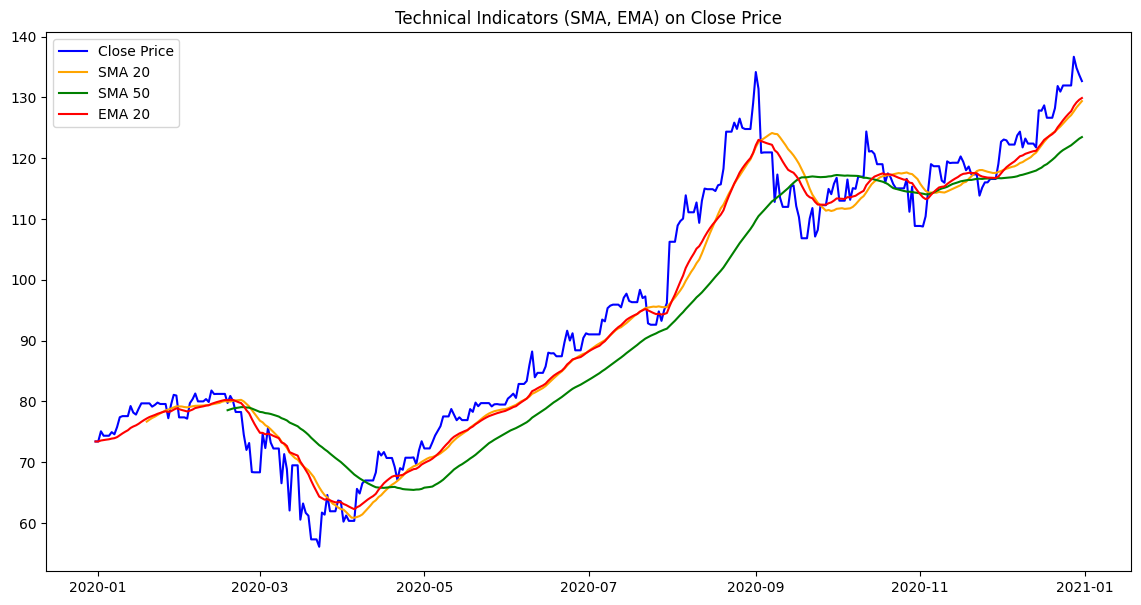

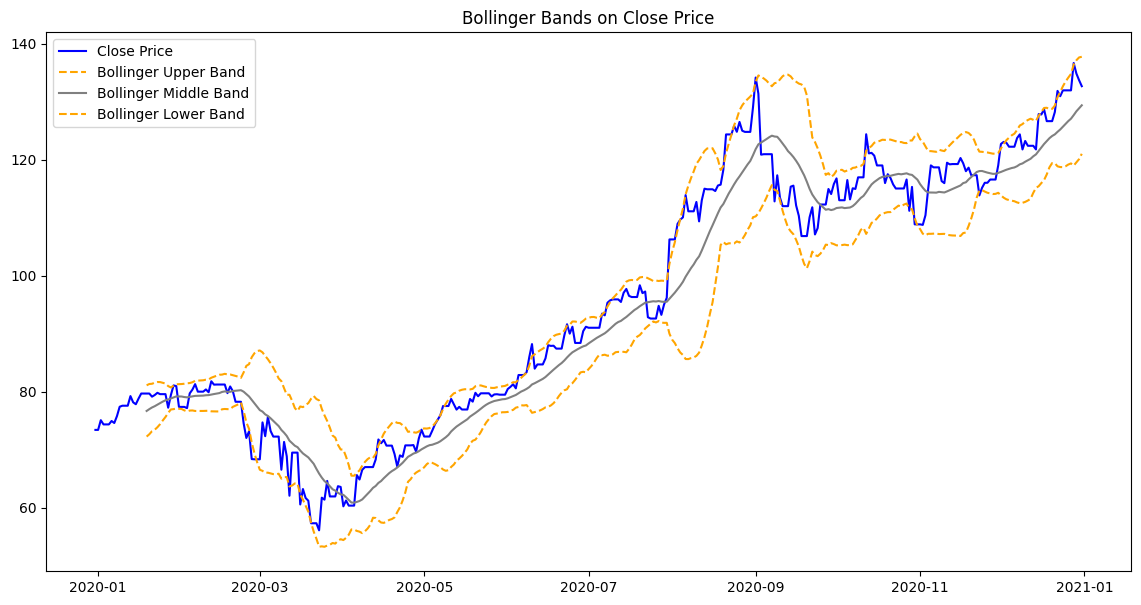

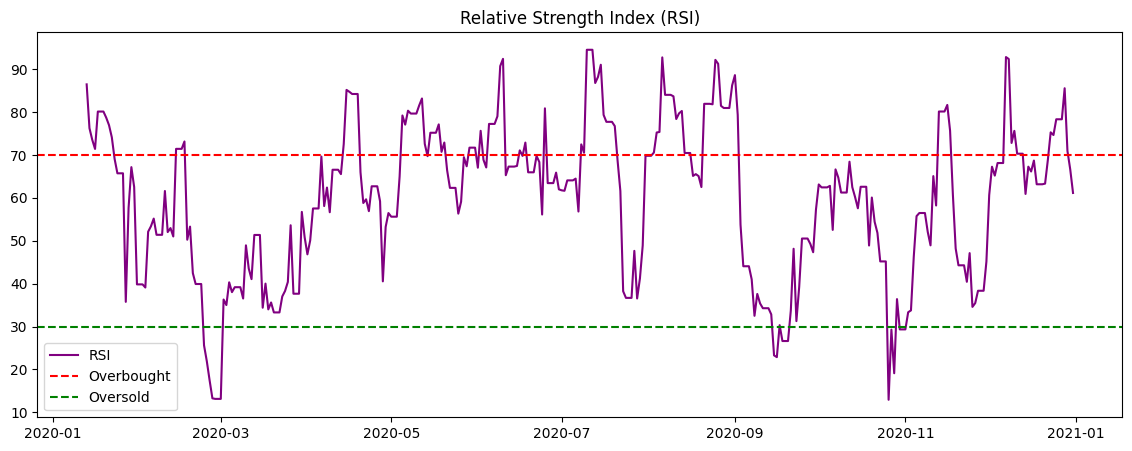

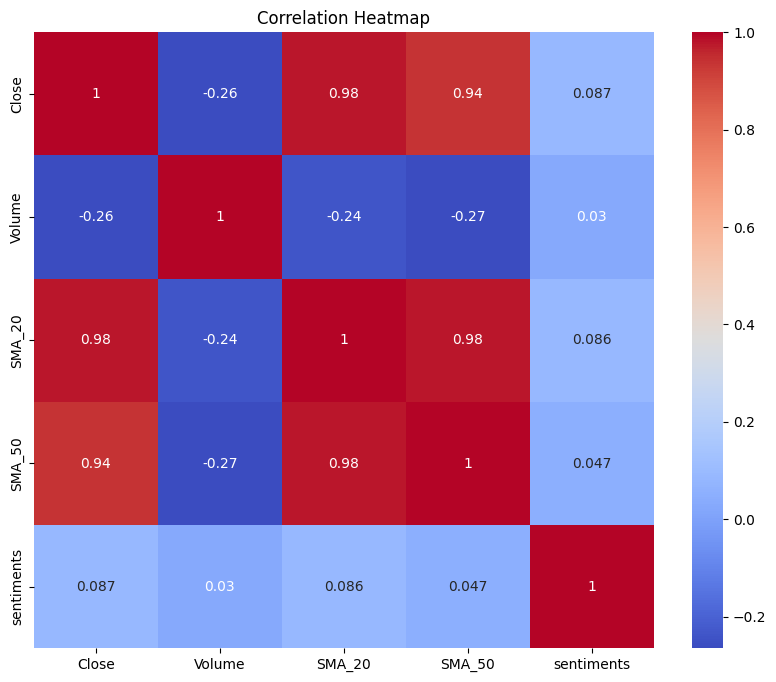

In [2]:
stock = "AAPL"
# Example usage
df = pd.read_csv(
    f"/Users/moatasimfarooque/Desktop/CATIA/Latest/processed_stocks/{stock}_processed.csv"
)

analysis = EDAAnalysis(df)
analysis.add_technical_indicators()
analysis.plot_technical_indicators()
analysis.plot_bollinger_bands()
analysis.plot_rsi()
analysis.plot_correlation_heatmap()